In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score

2025-03-11 12:57:48.526178: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 12:57:48.538306: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 12:57:48.585915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741719468.627863  852630 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741719468.642459  852630 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def crear_modelo_dscnn(input_shape, num_classes):
    """Crea un modelo DSCNN."""
    model = models.Sequential([
        layers.SeparableConv2D(64, (5, 5), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(axis=2,epsilon=1e-5),
        layers.MaxPooling2D(pool_size=(2, 2), padding="same"),

        layers.SeparableConv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
        layers.BatchNormalization(axis=2,epsilon=1e-5),

        layers.SeparableConv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
        layers.BatchNormalization(axis=2,epsilon=1e-5),

        layers.SeparableConv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
        layers.BatchNormalization(axis=2,epsilon=1e-5),

        layers.Flatten(),
        layers.Dense(1000, activation='relu'),
        layers.Dense(600, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [3]:
# Parámetros
input_shape = (100, 100, 1)
num_classes = 12

In [4]:
# Crear el modelo
model = crear_modelo_dscnn(input_shape, num_classes)

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2025-03-11 12:58:00.801628: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
#Cargar datos de entrenamiento
training_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_matriz.npy" ### "Input data npy file" 
x_sample = np.load ( training_set )
x_train = x_sample.reshape ((x_sample.shape[0], 100, 100,1)) # No. de muestras, Longitud, Ancho, No. de filtros
# Cargar etiquetas de los datos de entrenamiento
training_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_etiquetas.npy" ### "Input label npy file" 
y_label = np.load ( training_label )
y_train = to_categorical(y_label, num_classes=12)

In [6]:
# Carga de datos de validacion
testing_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_matriz.npy"
test_sample = np.load ( testing_set )
x_test = test_sample.reshape ( (test_sample.shape[0], 100, 100, 1) ) # no. of samples, x pixels, y pixels, no. of files

# Carga de etiquetas de datos de validacion
testing_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_etiquetas.npy"
test_label = np.load ( testing_label )
test_label_compare = test_label
y_test = to_categorical (test_label,num_classes=12 )

In [7]:
# Entrenar el modelo
epocas=60
train_history = model.fit(x_train, y_train, epochs=epocas, validation_split=0.25)



Epoch 1/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 877ms/step - accuracy: 0.1969 - loss: 3.3105 - val_accuracy: 0.0651 - val_loss: 2.4834
Epoch 2/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 832ms/step - accuracy: 0.5275 - loss: 1.3849 - val_accuracy: 0.1498 - val_loss: 2.4781
Epoch 3/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 827ms/step - accuracy: 0.8530 - loss: 0.4339 - val_accuracy: 0.1498 - val_loss: 2.4752
Epoch 4/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 825ms/step - accuracy: 0.9363 - loss: 0.2367 - val_accuracy: 0.1498 - val_loss: 2.4788
Epoch 5/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 839ms/step - accuracy: 0.9667 - loss: 0.1278 - val_accuracy: 0.1498 - val_loss: 2.4759
Epoch 6/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 822ms/step - accuracy: 0.9826 - loss: 0.0654 - val_accuracy: 0.1498 - val_loss: 2.4887
Epoch 7/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 830ms/step - accuracy: 0.9882 - loss: 0.0390 - val_accuracy: 0.1498 - val_loss: 2.5008
Epoch 8/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 839ms/step - accuracy: 0.9929 - loss: 0.0246 - val_accu

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ separable_conv2d                │ (None, 96, 96, 64)     │           153 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 64)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 46, 46, 64)     │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 64)     │            92 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 21, 21, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 11, 11, 128)    │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 9, 9, 128)      │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 128)      │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     3,201,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 600)            │       600,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │        48,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           972 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,647,385 (44.43 MB)

 Trainable params: 3,882,371 (14.81 MB)

 Non-trainable params: 270 (1.05 KB)

 Optimizer params: 7,764,744 (29.62 MB)

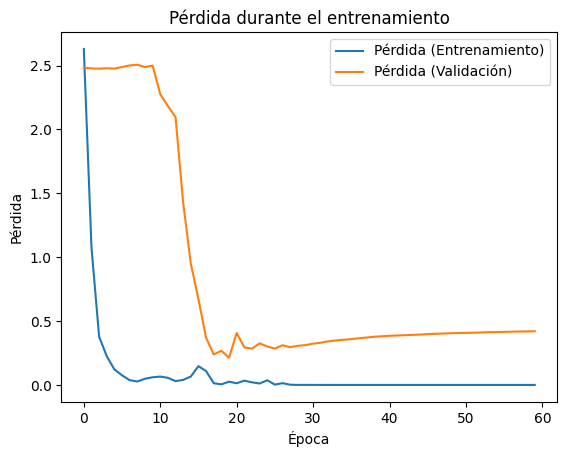

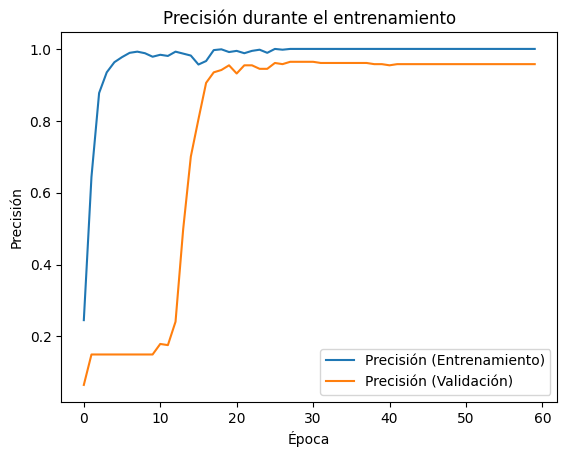

In [9]:
plt.plot(train_history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(train_history.history['val_loss'], label='Pérdida (Validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Gráfico de la precisión

plt.plot(train_history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(train_history.history['val_accuracy'], label='Precisión (Validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


#Calcular el MCC              MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
y_pred = model.predict(x_test) # o x_test
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
num_classes = cm.shape[0]
mcc_per_class = []
for i in range(num_classes):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
        mcc_per_class.append(0)
    else:
        mcc_per_class.append(numerator / denominator)
mcc = np.mean(mcc_per_class)
print("MCC:", mcc)

# Calculo de precision
# Calcular precisión micro
precision_micro = precision_score(y_true_classes, y_pred_classes, average='micro')
print("Precisión micro (Prueba):", precision_micro)

# Calcular precisión macro
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')
print("Precisión macro (Prueba):", precision_macro)

# Calcular precisión ponderada
precision_weighted = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precisión ponderada (Prueba):", precision_weighted)

# Calcular precisión por clase
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)
print("Precisión por clase (Prueba):", precision_per_class)

154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9426 - loss: 0.4608
Loss: 0.44974106550216675
Accuracy: 0.9466177821159363
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step
MCC: 0.9377876407847828
Precisión micro (Prueba): 0.9466177669111654
Precisión macro (Prueba): 0.9416097042238856
Precisión ponderada (Prueba): 0.948950189984437
Precisión por clase (Prueba): [0.82222222 0.99561884 0.96836983 0.92626728 0.99755501 0.99502488
 0.83936652 0.98965517 0.9342723  0.94196429 0.96338028 0.92561983]


In [11]:
# Obtener las predicciones
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step


In [12]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

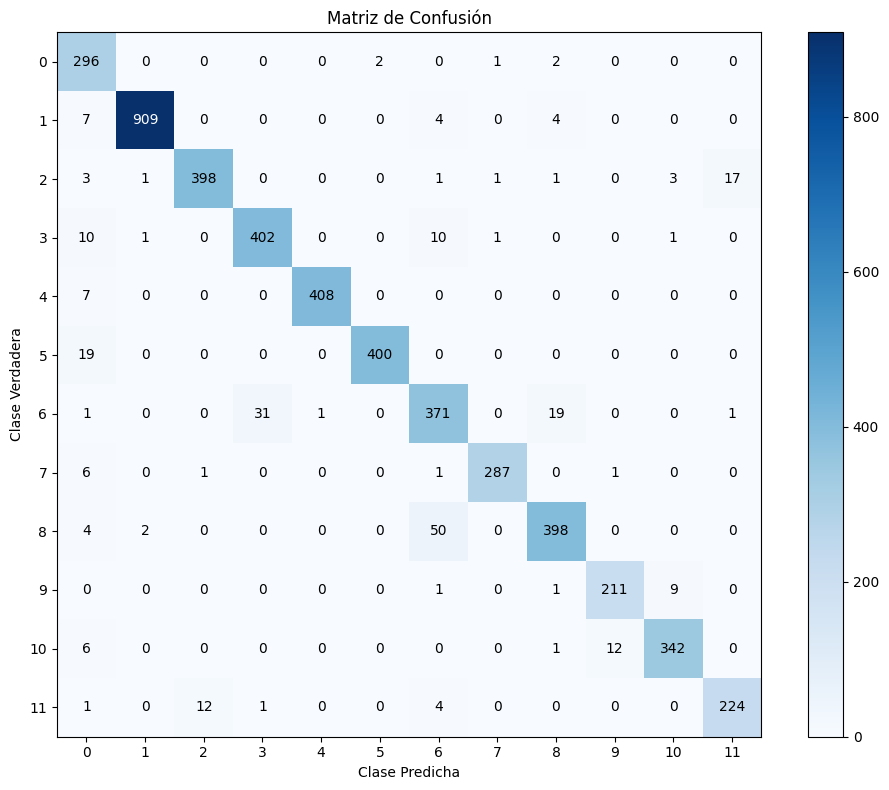

In [13]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(12)
plt.xticks(tick_marks, range(12))
plt.yticks(tick_marks, range(12))
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()